# Feature Extraction PCA 

In [45]:
import pandas as pd
import numpy as np
import time

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score,accuracy_score,precision_score,recall_score,f1_score


import warnings
warnings.filterwarnings("ignore")

In [11]:
df = pd.read_csv('train_mnist.csv')
df.shape

(42000, 785)

In [15]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
13240,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


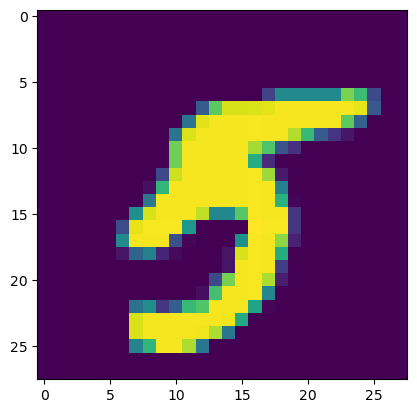

In [16]:
plt.imshow(df.iloc[13240,1:].values.reshape(28,28))

In [18]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((33600, 784), (8400, 784), (33600,), (8400,))

In [29]:
knn= KNeighborsClassifier()
knn.fit(x_train,y_train)
start = time.time()
y_pred = knn.predict(x_test)
print('Time taken for computation of result :',time.time()- start)

print('accuracy_score comes out to be without PCA :',accuracy_score(y_test,y_pred))

Time taken for computation of result : 22.437214136123657
accuracy_score comes out to be without PCA : 0.9648809523809524


In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)



In [41]:
pca = PCA(n_components=None)

x_train_trf = pca.fit_transform(x_train)
x_test_trf  = pca.transform(x_test)

knn_pca = KNeighborsClassifier()
knn_pca.fit(x_train_trf,y_train)
start = time.time()
y_pred_pca = knn_pca.predict(x_test_trf)
print('Time taken for computation of result :',time.time()- start)

print('accuracy_score comes out to be with PCA :',accuracy_score(y_test,y_pred_pca))

Time taken for computation of result : 22.492682218551636
accuracy_score comes out to be with PCA : 0.9391666666666667


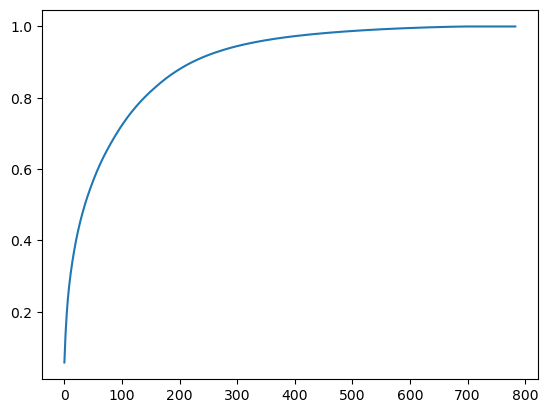

In [43]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
##plot imply that 90% of information is gained when we select 400-450 no of feautres


In [44]:
#Implying PCA for 450 number of features
pca = PCA(n_components=450)

x_train_trf = pca.fit_transform(x_train)
x_test_trf  = pca.transform(x_test)

knn_pca = KNeighborsClassifier()
knn_pca.fit(x_train_trf,y_train)
start = time.time()
y_pred_pca = knn_pca.predict(x_test_trf)
print('Time taken for computation of result :',time.time()- start)

print('accuracy_score comes out to be with PCA :',accuracy_score(y_test,y_pred_pca))
#Time taken 18.35 Sec and accuracy came 0.94

Time taken for computation of result : 18.3548800945282
accuracy_score comes out to be with PCA : 0.9427380952380953
